1.Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

2.Data Collection and Preprocessing

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [6]:
dataset_train.head()  # Shows the first 5 rows of the dataset
 # Provides statistical summary of the data


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
# Keras only takes numpy array
training_set = dataset_train.iloc[:, 1:2].values
training_set.shape

(1258, 1)

In [4]:
sc = MinMaxScaler(feature_range=(0, 1))
# Fit: Get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [8]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train.shape

(1198, 60)

In [7]:
y_train.shape

(1198,)

In [9]:
# Reshape X_train to be suitable for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape


(1198, 60, 1)

3.Exploratory analysis

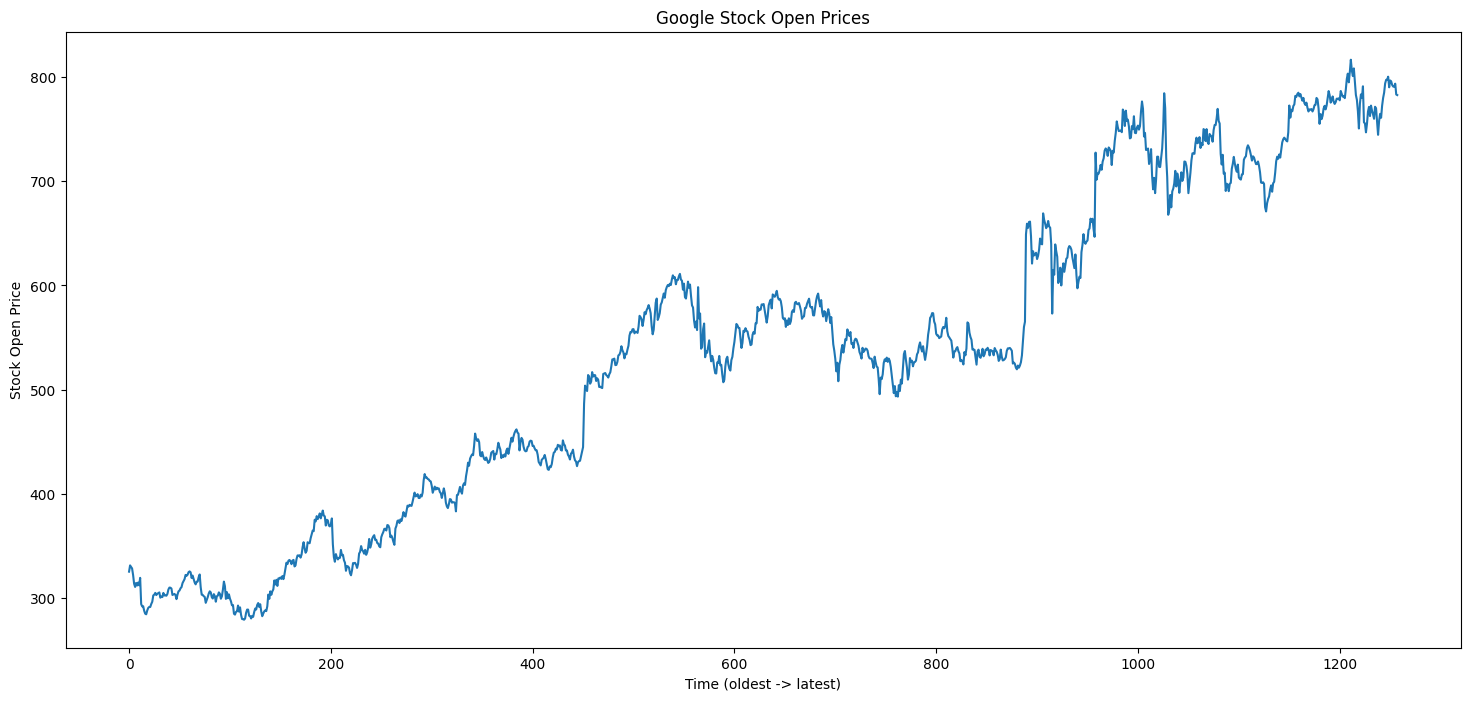

In [10]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()


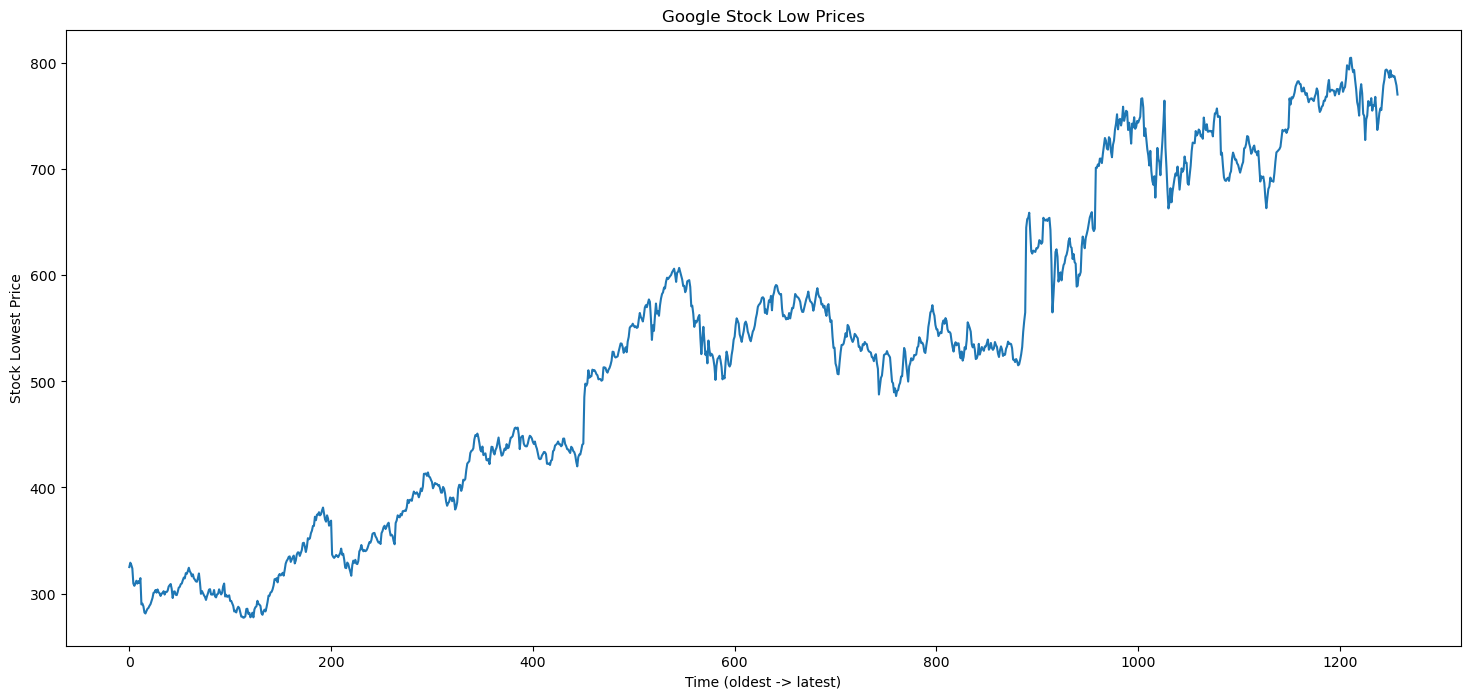

In [10]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()


4.Model Creation and Fitting

In [11]:
regressor = Sequential()

# First LSTM layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

# Output Layer
regressor.add(Dense(units=1))


C:\Users\Test\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
regressor.fit(X_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 0.0922
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0062
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0057
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0048
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0050
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0044
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0047
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0051
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0052
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0040
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0049
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0041
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0040
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0043
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - lo

5.Model Evaluation

In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [16]:
# Keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.shape


(20, 1)

In [19]:
# Combine train and test datasets
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


In [20]:
# Reshape inputs to have 1 column
inputs = inputs.reshape(-1, 1)

# Scale input
inputs = sc.transform(inputs)


In [21]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

# Reshape X_test to match LSTM input shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(20, 60, 1)

6.Model Prediction

In [22]:
predicted_stock_price = regressor.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


In [23]:
# Inverse the scaling to get real price values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


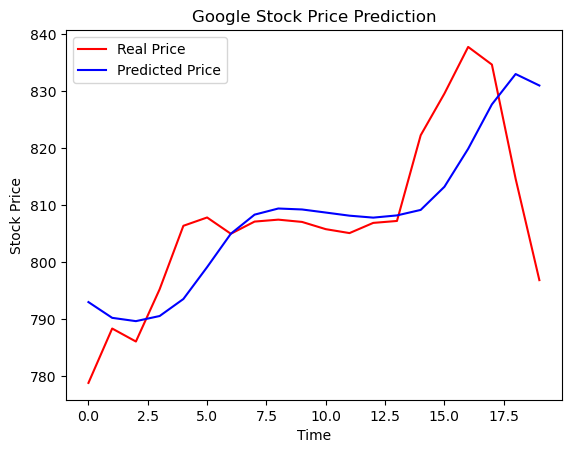

In [21]:
plt.plot(real_stock_price, color='red', label='Real Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


### **Theory:**

Recurrent Neural Networks (RNNs) are a class of neural networks designed for processing sequential data. Unlike traditional feedforward neural networks, RNNs have connections that form cycles, allowing them to retain information from previous time steps in their hidden states. This makes RNNs particularly suited for tasks where the input data is sequential or has temporal dependencies, such as time series forecasting, natural language processing, and speech recognition.

The key feature of RNNs is their ability to "remember" past information through loops in their architecture, which gives them the ability to capture the temporal dependencies present in sequential data. This memory is updated at each time step, allowing the model to take into account both the current input and the previous hidden state.

### **Key Components of an RNN**

- **Input Layer:**  
  The input layer of an RNN receives the sequential data. At each time step, the network takes in one element from the sequence and processes it.

- **Recurrent Layer:**  
  The recurrent layer is the core of the RNN. At each time step, the hidden state of the network is updated based on the current input and the previous hidden state. This allows the network to remember and update information over time.

  The recurrent update rule can be represented as:

  $
  h_t = f(W \cdot x_t + U \cdot h_{t-1} + b)
  $

  Where:
  - $ h_t $ is the hidden state at time step $ t $,
  - $ x_t $ is the input at time step $ t $,
  - $ W $ and $ U $ are the weight matrices,
  -  $h_{t-1} $ is the hidden state from the previous time step, and
  -  $b $ is the bias term.
  
  The function  f  is typically a non-linear activation function such as the **tanh** or **ReLU**.

- **Output Layer:**  
  The output layer generates the final prediction based on the final hidden state. The output can be used for various tasks such as classification, regression, or sequence generation. Depending on the task, the activation function of the output layer may vary (e.g., softmax for classification, linear for regression).

### **Why RNNs Are Effective**

- **Memory of Previous Inputs:**  
  RNNs are designed to retain information over time, which allows them to effectively process and predict based on previous time steps. This makes them ideal for sequential tasks where context from earlier inputs is crucial for understanding the current input.

- **Parameter Sharing Across Time Steps:**  
  RNNs share parameters across all time steps, which significantly reduces the number of parameters and makes the model more efficient. This weight sharing helps in learning patterns that are consistent throughout the sequence.

- **Temporal Dependencies:**  
  The architecture of RNNs allows them to capture long-range temporal dependencies in sequential data. This is especially useful for tasks such as language modeling, machine translation, and time series analysis, where understanding the context across different time steps is important.

### **Challenges of RNNs**

- **Vanishing and Exploding Gradients:**  
  One challenge with traditional RNNs is the problem of vanishing and exploding gradients during backpropagation. When training RNNs over long sequences, the gradients can either shrink (vanish) or grow exponentially (explode), making it difficult for the network to learn long-term dependencies. This issue is addressed in more advanced architectures such as LSTMs and GRUs.

- **Difficulty in Long-Term Memory:**  
  Standard RNNs can struggle with learning long-term dependencies, especially when the sequences are very long. This is due to the inherent limitations of the model's ability to propagate information over many time steps.

- **Computational Complexity:**  
  RNNs are computationally expensive due to their sequential nature, where each time step's computation depends on the previous one. This makes RNNs less efficient compared to models like feedforward networks or CNNs for parallelizable tasks.



### **Theory:**

Recurrent Neural Networks (RNNs) are a class of neural networks designed for processing sequential data. Unlike traditional feedforward neural networks, RNNs have connections that form cycles, allowing them to retain information from previous time steps in their hidden states. This makes RNNs particularly suited for tasks where the input data is sequential or has temporal dependencies, such as time series forecasting, natural language processing, and speech recognition.

The key feature of RNNs is their ability to "remember" past information through loops in their architecture, which gives them the ability to capture the temporal dependencies present in sequential data. This memory is updated at each time step, allowing the model to take into account both the current input and the previous hidden state.

### **Key Components of an RNN**

- **Input Layer:**  
  The input layer of an RNN receives the sequential data. At each time step, the network takes in one element from the sequence and processes it.

- **Recurrent Layer:**  
  The recurrent layer is the core of the RNN. At each time step, the hidden state of the network is updated based on the current input and the previous hidden state. This allows the network to remember and update information over time.

  The recurrent update rule can be represented as:

  $
  h_t = f(W \cdot x_t + U \cdot h_{t-1} + b)
  $

  Where:
  - $ h_t $ is the hidden state at time step $ t $,
  - $ x_t $ is the input at time step $ t $,
  - $ W $ and $ U $ are the weight matrices,
  -  $h_{t-1} $ is the hidden state from the previous time step, and
  -  $b $ is the bias term.
  
  The function  f  is typically a non-linear activation function such as the **tanh** or **ReLU**.

- **Output Layer:**  
  The output layer generates the final prediction based on the final hidden state. The output can be used for various tasks such as classification, regression, or sequence generation. Depending on the task, the activation function of the output layer may vary (e.g., softmax for classification, linear for regression).

### **Why RNNs Are Effective**

- **Memory of Previous Inputs:**  
  RNNs are designed to retain information over time, which allows them to effectively process and predict based on previous time steps. This makes them ideal for sequential tasks where context from earlier inputs is crucial for understanding the current input.

- **Parameter Sharing Across Time Steps:**  
  RNNs share parameters across all time steps, which significantly reduces the number of parameters and makes the model more efficient. This weight sharing helps in learning patterns that are consistent throughout the sequence.

- **Temporal Dependencies:**  
  The architecture of RNNs allows them to capture long-range temporal dependencies in sequential data. This is especially useful for tasks such as language modeling, machine translation, and time series analysis, where understanding the context across different time steps is important.

### **Challenges of RNNs**

- **Vanishing and Exploding Gradients:**  
  One challenge with traditional RNNs is the problem of vanishing and exploding gradients during backpropagation. When training RNNs over long sequences, the gradients can either shrink (vanish) or grow exponentially (explode), making it difficult for the network to learn long-term dependencies. This issue is addressed in more advanced architectures such as LSTMs and GRUs.

- **Difficulty in Long-Term Memory:**  
  Standard RNNs can struggle with learning long-term dependencies, especially when the sequences are very long. This is due to the inherent limitations of the model's ability to propagate information over many time steps.

- **Computational Complexity:**  
  RNNs are computationally expensive due to their sequential nature, where each time step's computation depends on the previous one. This makes RNNs less efficient compared to models like feedforward networks or CNNs for parallelizable tasks.

